# Anomaly Detection in MNIST Dataset

## Notes from the Referenced notebook
Version 1.1

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book Applied Deep Learning: a case based approach, 2nd edition from APRESS by U. Michelucci and M. Sperti.

The purpose of this notebook is to show you a possible application of autoencoders: anomaly detection, on a dataset taken from the real world.

#### **NOTE from ME!**
This notebook is created with the help of an other Notebook. This is modified for my own understanding but not all is changed. The procedures are also based to the original medium 

### Import libraries

In [1]:
# Essential Ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tensorflow Libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

2025-04-05 18:04:32.224423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743847472.237221  254965 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743847472.240884  254965 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-05 18:04:32.255261: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Importing MNIST dataset

In [3]:
from keras.datasets import mnist

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [4]:
# Normalizing the data
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

### Sample Data visualization

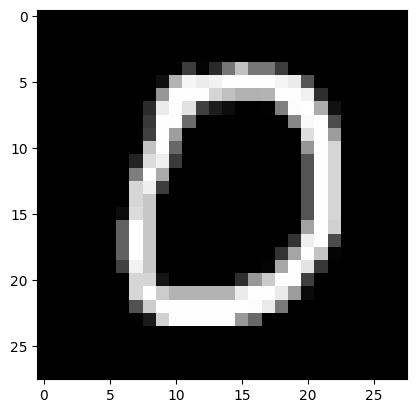

In [5]:
plt.gray()
plt.imshow(mnist_x_test[10].reshape(28, 28))
plt.show()

### Model Creation

In [6]:
input_layer = Input(shape=(784,), name = 'input')
dimension_input = Input(shape=(64,), name = 'dimension_input')
encoder_layer = Dense(64, activation = 'relu', name = 'encoder')
decoder_layer = Dense(784, activation='sigmoid', name = 'decoder')

autoencoder = Sequential(
    [input_layer,
     encoder_layer,
     decoder_layer],
    name = 'Auto_Encoder_model'
)
autoencoder.summary()

I0000 00:00:1743847474.329373  254965 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2156 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "Auto_Encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

- As for autoencoder's Architecture, I created 2 layers that represent the encoder and decoder parts. The Encoder layer accepts 784 pixels and goes through the sigmoid activation function. The output of the encoder layer has 64 dimension size and will go through to the decoder with relu as its activation function. 

In [7]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [8]:
history = autoencoder.fit(mnist_x_train, mnist_x_train,
                          epochs = 20,
                          batch_size = 100,
                          shuffle = True,
                          validation_data = (mnist_x_test, mnist_x_test),
                          verbose = 1)

Epoch 1/20


I0000 00:00:1743847475.554520  255080 service.cc:148] XLA service 0x72e32c009cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743847475.554540  255080 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-04-05 18:04:35.567641: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743847475.629153  255080 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-05 18:04:36.615497: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_92', 56 bytes spill stores, 56 bytes spill loads

2025-04-05 18:04:36.639750: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_92', 4

135/600 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0060 - loss: 0.4159

I0000 00:00:1743847477.690205  255080 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0106 - loss: 0.2679 - val_accuracy: 0.0106 - val_loss: 0.1233
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0115 - loss: 0.1158 - val_accuracy: 0.0108 - val_loss: 0.0955
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0116 - loss: 0.0931 - val_accuracy: 0.0119 - val_loss: 0.0842
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0124 - loss: 0.0834 - val_accuracy: 0.0118 - val_loss: 0.0787
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0130 - loss: 0.0789 - val_accuracy: 0.0120 - val_loss: 0.0763
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0133 - loss: 0.0767 - val_accuracy: 0.0122 - val_loss: 0.0750
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0126 - loss: 0.0755 - val_accuracy: 0.0120 - val_loss: 0.0743
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0122 - loss: 0.0748 - val_accuracy: 0.0129 - val_

In [9]:
# Creting a Model using the trained Layers
encoder_layer = Model(input_layer, autoencoder.get_layer('encoder')(input_layer))
decoder_layer  = Model(dimension_input, autoencoder.get_layer('decoder')(dimension_input))

In [10]:
# Predictions with created models
encoded_imgs = encoder_layer.predict(mnist_x_test)
decoded_imgs = decoder_layer.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


In [11]:
# Reconstruction Error
RE = ((mnist_x_test - decoded_imgs)**2).mean(axis = 1)
RE_original = RE.copy()

In [12]:
# Top 5 highest Error
RE.sort()
print(RE[-5:])

[0.01911462 0.01948622 0.02113296 0.02163766 0.02396354]


In [13]:
def plotvs_orig_recon(re, suptitle):
    """Visualization of the Original to Reconstructed Image"""
    fig = plt.figure(figsize = (14, 7))
    
    ax = fig.add_subplot(1, 2, 1)
    plt.title('Original Image', fontsize = 16)
    plt.gray()
    plt.imshow(mnist_x_test[re].reshape(28,28))
    
    ax = fig.add_subplot(1, 2, 2)
    plt.title('Reconstructed Image', fontsize = 16)
    plt.gray()
    plt.imshow(decoded_imgs[re].reshape(28,28))

    plt.suptitle(f'TOP {suptitle}', fontsize = 32)

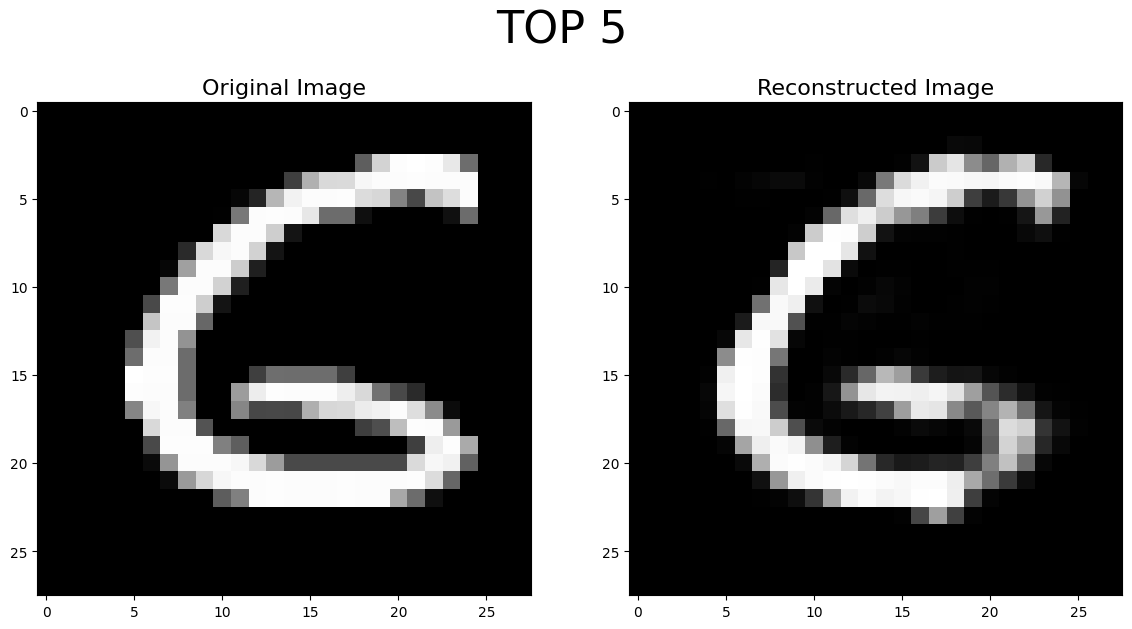

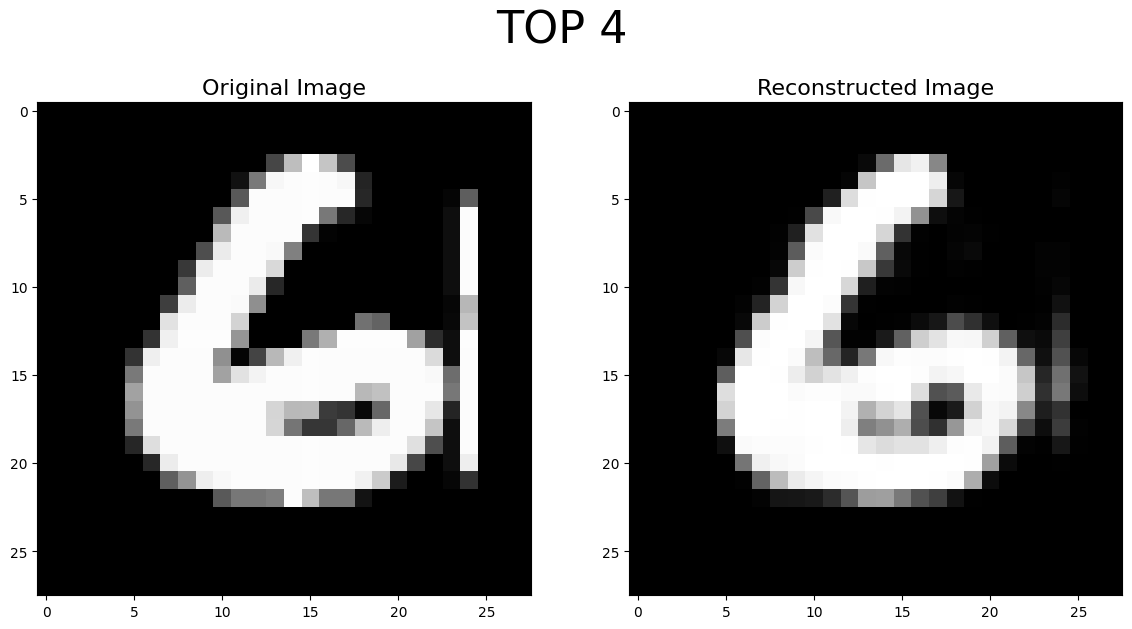

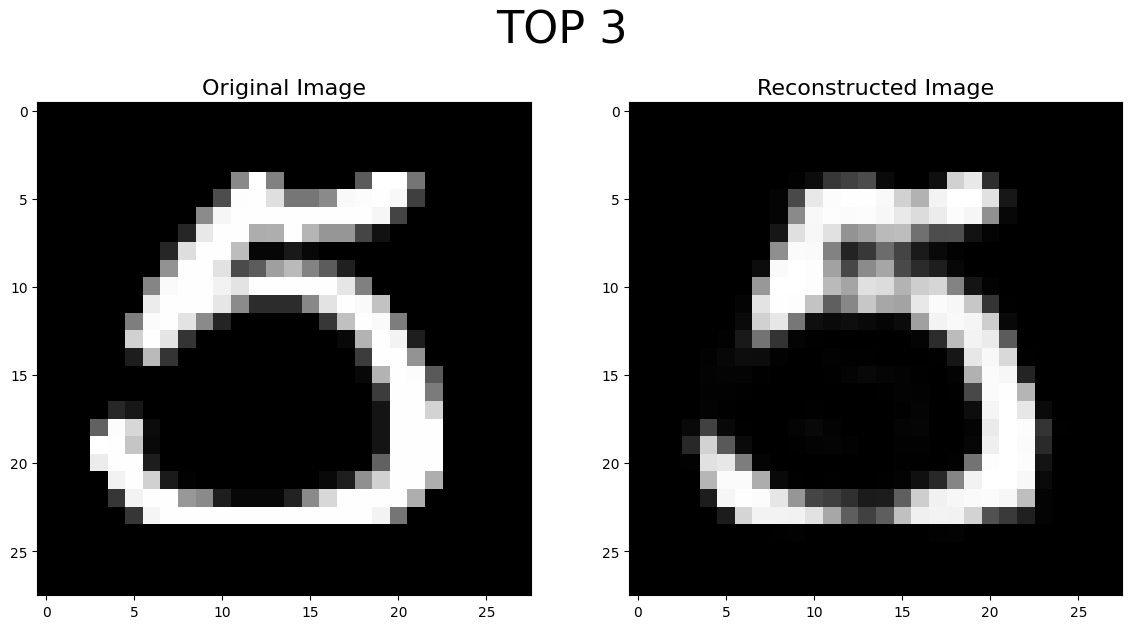

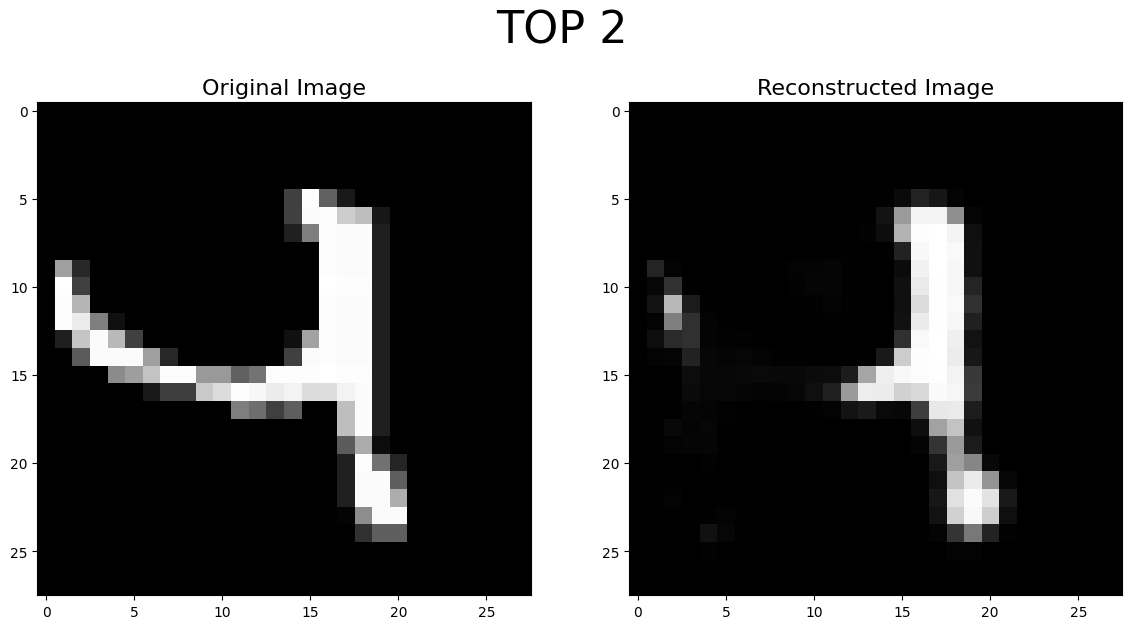

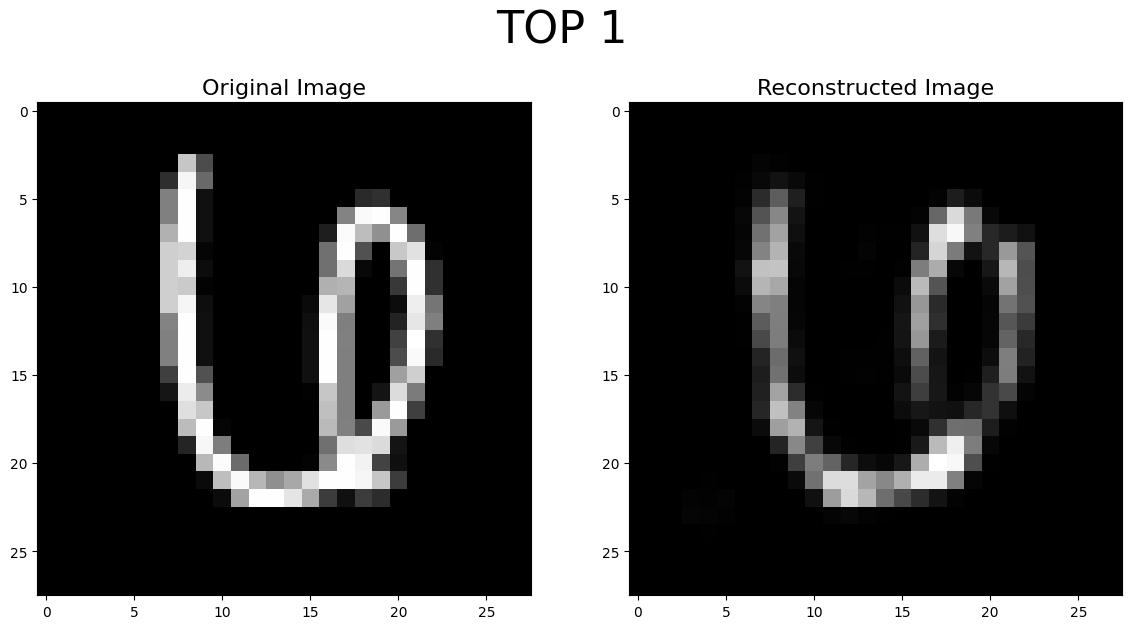

In [14]:
for index in RE[-5:]:
    r_error = list(RE_original).index(index)
    plotvs_orig_recon(r_error, 5 - list(RE[-5:]).index(index))

In [15]:
# Created by DaBloat